In [19]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier 
data = pd.read_csv('expanded_dataset.csv')

In [2]:
#code to do label encoding but manual function to understand the performance from 0 to 9 i.e Nedds improvement to excellent
def map_scores_to_labels(score):
    if 0 <= score <= 9:
        return 0
    elif 10 <= score <= 19:
        return 1
    elif 20 <= score <= 29:
        return 2
    elif 30 <= score <= 39:
        return 3
    elif 40 <= score <= 49:
        return 4
    elif 50 <= score <= 59:
        return 5
    elif 60 <= score <= 69:
        return 6
    elif 70 <= score <= 79:
        return 7
    elif 80 <= score <= 89:
        return 8
    elif 90 <= score <= 100:
        return 9
    else:
        return -1  # value to signify 'Out of Range' or can't predict
scores = data['correctness']
Performance= [map_scores_to_labels(score) for score in scores]
df = pd.DataFrame({'Target_performance': Performance})
data['Target_performance']=df['Target_performance']

In [3]:
features = ['Category name', 'total questions', 'correct questions', 'correctness', 'Job Profile Name', 'User name']
target = 'Target_performance'
# Encoding categorical variables
label_encoders = {}
for col in ['Category name', 'Job Profile Name', 'User name']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [4]:
# Trainng starts here
X = data[features]
y = data[target]
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the model (Random Forest Classifier as an example)
model =RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [5]:
# Make predictions on the test set
predictions = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
class_report = classification_report(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{class_report}')


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       165
           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        40

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [6]:
# Prediction using new data
new_data = pd.DataFrame({
    'Category name': ['Front-end Technologies(Proficiency in HTML, CSS, JavaScript, and front-end frameworks/libraries like React, Angular, or Vue.js.)'],
    'total questions': [10],
    'correct questions': [5],
    'correctness': [50],
    'Job Profile Name': ['Full Stack Developer'],
    'User name': ['andrew']
})
# Transform categorical columns in new data
for col in ['Category name', 'Job Profile Name', 'User name']:
    new_data[col] = label_encoders[col].transform(new_data[col])

# Predict 'Performance' for new data
predicted_performance = model.predict(new_data)
print(f'Predicted Performance for new data: {predicted_performance}')

Predicted Performance for new data: [5]


In [7]:
# Consider using other evaluation metrics in addition to accuracy, like precision, recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model with additional metrics
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [8]:
#performing K cross-validation

In [9]:
from sklearn.model_selection import cross_val_score

In [20]:
def average_accuracy(arr):
    score=0
    for val in arr:
        score+=val
    return (score/len(arr))
# lr=cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000,),X,y,cv=4)
knn=cross_val_score(KNeighborsClassifier(),X,y,cv=4)
nb=cross_val_score(GaussianNB(),X,y,cv=4)
rf=cross_val_score(RandomForestClassifier(),X,y,cv=4)
svc=cross_val_score(SVC(),X,y,cv=7)
gb=cross_val_score(GradientBoostingClassifier(),X,y,cv=4)
dt=cross_val_score(DecisionTreeClassifier(),X,y,cv=4)
# print("Logistic regression:", average_accuracy(lr))
print("K-NN",average_accuracy(knn))
print("Random Forest Classifier",average_accuracy(rf))
print("Support Vector Machine",average_accuracy(svc))
print("Gradient Boosting",average_accuracy(gb))
print("Decision Tree",average_accuracy(dt))
print("Naive Bays",average_accuracy(nb))

K-NN 0.9695
Random Forest Classifier 1.0
Support Vector Machine 0.6995075100338257
Gradient Boosting 1.0
Decision Tree 1.0
Naive Bays 0.9764999999999999


In [11]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'{name} Accuracy: {accuracy}')

Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0


In [16]:
# Prediction using new data
new_data = pd.DataFrame({
    'Category name': ['Front-end Technologies(Proficiency in HTML, CSS, JavaScript, and front-end frameworks/libraries like React, Angular, or Vue.js.)'],
    'total questions': [10],
    'correct questions': [10],
    'correctness': [100],
    'Job Profile Name': ['Full Stack Developer'],
    'User name': ['andrew']
})
# Transform categorical columns in new data
for col in ['Category name', 'Job Profile Name', 'User name']:
    new_data[col] = label_encoders[col].transform(new_data[col])

# Predict 'Performance' for new data
predicted_performance = model.predict(new_data)
print(f'Predicted Performance for new data: {predicted_performance}')

Predicted Performance for new data: [9]


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred =model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[147,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  45,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  15,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  20,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  25,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  17,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  20,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  17,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  25,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  16,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  53]],
      dtype=int64)

Text(95.72222222222221, 0.5, 'Actual')

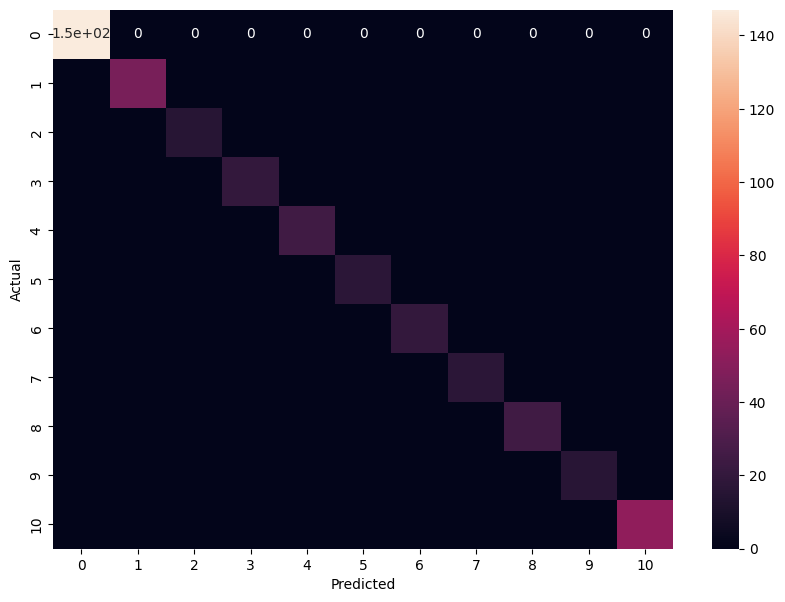

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')